# descriptive.ipynb

This notebook calculated descriptive statistics in detail. The main notebook reports just a summary.

The `display_summary_table` and `plot_descriptive` functions below are called from the main notebook.

<br>
<br>

In [1]:
from IPython.display import display,Markdown #,HTML
import numpy as np
from scipy import stats
from matplotlib import pyplot as plt
import pandas as pd


def display_title(s, pref='Figure', num=1, center=False):
    ctag = 'center' if center else 'p'
    s    = f'<{ctag}><span style="font-size: 1.2em;"><b>{pref} {num}</b>: {s}</span></{ctag}>'
    if pref=='Figure':
        s = f'{s}<br><br>'
    else:
        s = f'<br><br>{s}'
    display( Markdown(s) )



Below the previously developed `parse_data.ipynb` notebook is run. See that notebook for details.

In [2]:
%run parse_data.ipynb

df.describe()


,Anxiety,Age,Duration,BPM
count,624.000000,624.000000,624.000000,624.000000
mean,5.866186,24.753205,3.713462,123.214744
std,2.767640,11.709293,3.092419,32.899605
min,0.000000,10.000000,0.000000,4.000000
25%,4.000000,18.000000,2.000000,100.000000
50%,6.000000,21.000000,3.000000,120.000000
75%,8.000000,27.000000,5.000000,144.000000
max,10.000000,89.000000,24.000000,220.000000


To create a custom display of descriptive statistics, let's first define functions that will calculate central tendency and dispersion metrics.

Refer also to [this notebook](https://github.com/0todd0000/OpenBook-DataAnalysisPracticeInPythonAndJupyter/blob/master/Lessons/Lesson04/5-Examples/DescriptiveStatsExamples.ipynb) for details regarding how create custom descriptive statistics tables.

In [3]:
def central(x, print_output=True):
    x0     = np.mean( x )
    x1     = np.median( x )
    mode = stats.mode(x).mode
    x2 = mode[0] if isinstance(mode, np.ndarray) and len(mode) > 0 else mode
    return pd.Series([x0, x1, x2], index=['mean', 'median', 'mode'])


def dispersion(x, print_output=True):
    y0 = np.std( x ) # standard deviation
    y1 = np.min( x )  # minimum
    y2 = np.max( x )  # maximum
    y3 = y2 - y1      # range
    y4 = np.percentile( x, 25 ) # 25th percentile (i.e., lower quartile)
    y5 = np.percentile( x, 75 ) # 75th percentile (i.e., upper quartile)
    y6 = y5 - y4 # inter-quartile range
    return pd.Series([y0, y1, y2, y3, y4, y5, y6], index=['std', 'min', 'max', 'range', '25th_percentile', '75th_percentile', 'IQR'])

<br>

Let's now assemble and display a central tendency table:

</br>

In [4]:

def display_central_tendency_table(num=1):
    display_title('Central tendency summary statistics.', pref='Table', num=num, center=False)
    df_central = df.apply(lambda x: central(x), axis=0)
    round_dict = {'Anxiety': 3, 'Age': 3, 'Duration': 6, 'BPM': 3}
    df_central = df_central.round( round_dict )
    row_labels = 'mean', 'median', 'mode'
    df_central.index = row_labels
    display( df_central )

display_central_tendency_table(num=1)

<br><br><p><span style="font-size: 1.2em;"><b>Table 1</b>: Central tendency summary statistics.</span></p>

,Anxiety,Age,Duration,BPM
mean,5.866,24.753,3.713462,123.215
median,6.000,21.000,3.000000,120.000
mode,7.000,18.000,2.000000,120.000


<br>

Let's repeat for a dispersion table:

</br>

In [5]:
def display_dispersion_table(num=1):
    display_title('Dispersion summary statistics.', pref='Table', num=num, center=False)
    round_dict            = {'quality': 3, 'acidity': 3, 'density': 6, 'sugar': 3}
    df_dispersion         = df.apply(lambda x: dispersion(x), axis=0).round( round_dict )
    row_labels_dispersion = 'st.dev.', 'min', 'max', 'range', '25th', '75th', 'IQR'
    df_dispersion.index   = row_labels_dispersion
    display( df_dispersion )

display_dispersion_table(num=2)


<br><br><p><span style="font-size: 1.2em;"><b>Table 2</b>: Dispersion summary statistics.</span></p>

,Anxiety,Age,Duration,BPM
st.dev.,2.765422,11.699906,3.08994,32.873232
min,0.000000,10.000000,0.00000,4.000000
max,10.000000,89.000000,24.00000,220.000000
range,10.000000,79.000000,24.00000,216.000000
25th,4.000000,18.000000,2.00000,100.000000
75th,8.000000,27.000000,5.00000,144.000000
IQR,4.000000,9.000000,3.00000,44.000000


Let's save the variables in easier-to-use variable names:

In [6]:
y    = df['Anxiety']
Drt = df['Duration']
Age = df['Age']
BPM = df['BPM']

Let's create scatterplots for the DV (Anxiety) vs. each of the three IVs (Age, Duration, BPM):

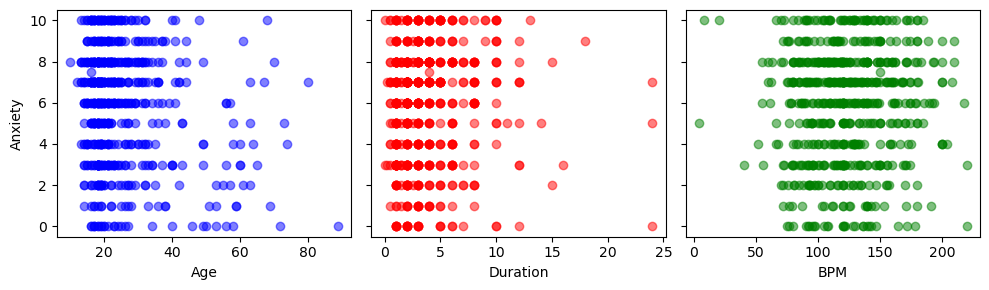

In [7]:
import matplotlib.pyplot as plt

fig,axs = plt.subplots( 1, 3, figsize=(10,3), tight_layout=True )
axs[0].scatter( Age, y, alpha=0.5, color='b' )
axs[1].scatter( Drt, y, alpha=0.5, color='r' )
axs[2].scatter( BPM, y, alpha=0.5, color='g' )

xlabels = 'Age', 'Duration', 'BPM' 
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_ylabel('Anxiety')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

The density xtick values are difficult to reach so let's make them easier to read:

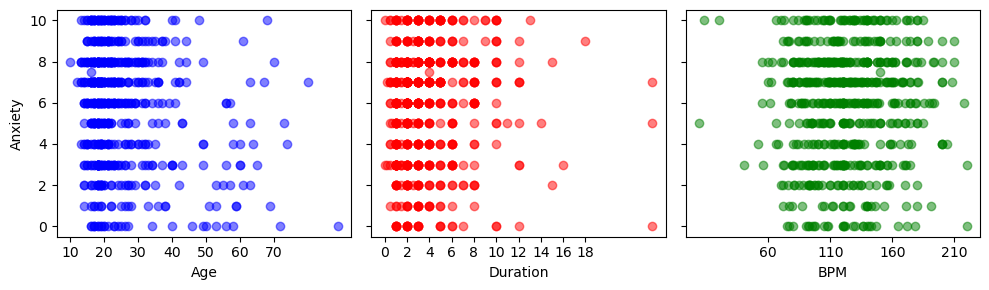

In [28]:
import numpy as np
import matplotlib.pyplot as plt

fig,axs = plt.subplots( 1, 3, figsize=(10,3), tight_layout=True )
axs[0].scatter( Age, y, alpha=0.5, color='b' )
axs[1].scatter( Drt , y, alpha=0.5, color='r' )
axs[2].scatter( BPM, y, alpha=0.5, color='g' )

xlabels = 'Age', 'Duration', 'BPM' 
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[0].set_xticks(np.arange(10, 80, 10)) 
axs[1].set_xticks(np.arange(0, 20, 2))
axs[2].set_xticks(np.arange(60, 220, 50))
axs[0].set_ylabel('Anxiety')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

Next let's add regression lines and correlation coefficients to each plot:

In [25]:
def corrcoeff(x, y):
    r = np.corrcoef(x, y)[0,1]
    return r

def plot_regression_line(ax, x, y, **kwargs):
    a,b   = np.polyfit(x, y, deg=1)
    x0,x1 = min(x), max(x)
    y0,y1 = a*x0 + b, a*x1 + b
    ax.plot([x0,x1], [y0,y1], **kwargs)


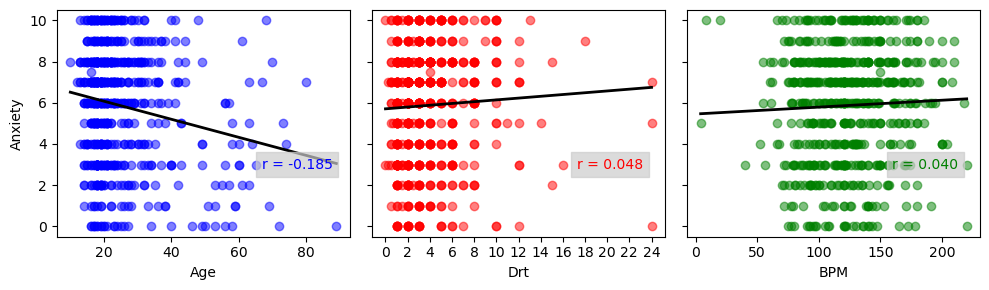

In [27]:
    
fig,axs = plt.subplots( 1, 3, figsize=(10,3), tight_layout=True )
ivs     = [Age, Drt, BPM]
colors  = 'b', 'r', 'g'
for ax,x,c in zip(axs, ivs, colors):
    ax.scatter( x, y, alpha=0.5, color=c )
    plot_regression_line(ax, x, y, color='k', ls='-', lw=2)
    r   = corrcoeff(x, y)
    ax.text(0.7, 0.3, f'r = {r:.3f}', color=c, transform=ax.transAxes, bbox=dict(color='0.8', alpha=0.7))

xlabels = 'Age', 'Drt', 'BPM' 
[ax.set_xlabel(s) for ax,s in zip(axs,xlabels)]
axs[1].set_xticks(np.arange(0, 26, 2))
axs[0].set_ylabel('Anxiety')
[ax.set_yticklabels([])  for ax in axs[1:]]
plt.show()

The correlation coefficients between Duration, BPM, and Anxiety are relatively low, suggesting no clear linear correlation between the DV and IVs. But Age and Anxiety are strongly correlated. Younger people (less than 30) show more intense anxiety rates, while people older than 60 have lower anxiety rates. Thus, I try to continue analyzing the correlations between Duration and anxiety among younger generations (Age<=30), and later compare it with the other generations (Age>30).


Age < 30  r = 0.040811748430225996
Age ≥ 30  r = 0.03839320673317756


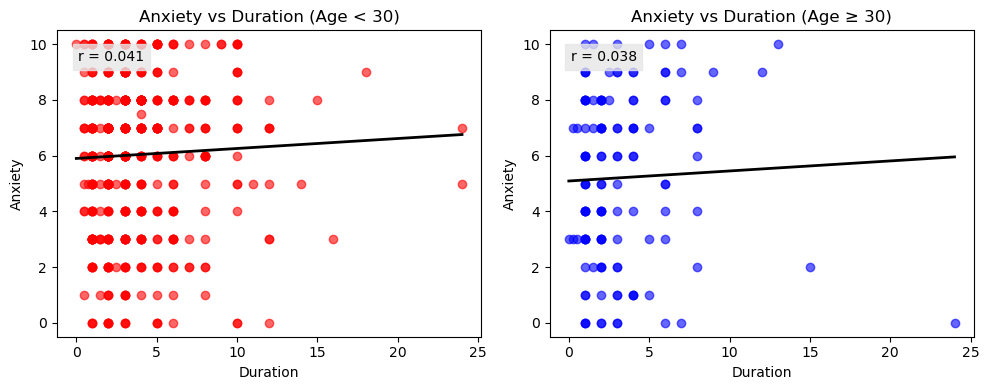

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def plot_regression_line(ax, x, y, **kwargs):
   x = np.array(x)
   y = np.array(y)
   mask = ~np.isnan(x) & ~np.isnan(y)
   x = x[mask]
   y = y[mask]

   m, b = np.polyfit(x, y, 1)

   xx = np.linspace(x.min(), x.max(), 100)
   yy = m * xx + b
   ax.plot(xx, yy, **kwargs)

young = Age < 30
old   = Age >= 30

r_young = np.corrcoef(Drt[young], y[young])[0, 1]
r_old   = np.corrcoef(Drt[old],   y[old])[0, 1]

print("Age < 30  r =", r_young)
print("Age ≥ 30  r =", r_old)

fig, axs = plt.subplots(1, 2, figsize=(10, 4), tight_layout=True)

ax = axs[0]
ax.scatter(Drt[young], y[young], alpha=0.6, color='r')
plot_regression_line(ax, Drt[young], y[young], color='k', lw=2)

ax.set_title('Anxiety vs Duration (Age < 30)')
ax.set_xlabel('Duration')
ax.set_ylabel('Anxiety')

ax.text(0.05, 0.9,
        f'r = {r_young:.3f}',
        transform=ax.transAxes,
        bbox=dict(color='0.9', alpha=0.8))


ax = axs[1]
ax.scatter(Drt[old], y[old], alpha=0.6, color='b')
plot_regression_line(ax, Drt[old], y[old], color='k', lw=2)

ax.set_title('Anxiety vs Duration (Age ≥ 30)')
ax.set_xlabel('Duration')
ax.set_ylabel('Anxiety')

ax.text(0.05, 0.9,
        f'r = {r_old:.3f}',
        transform=ax.transAxes,
        bbox=dict(color='0.9', alpha=0.8))

plt.show()


The results show that the Duration of listening to music does not correlate with Anxiety to a huge degree, and Age does not make much difference as well.
It is widely known that Anxiety is strongly correlated with social pressure, sleeping hours, or other factors. Music is only a very small part of it, so the results didn't surprise me. But maybe I do have to find another factor to analyze.



Let's now assemble all results into a single figure for reporting purposes:

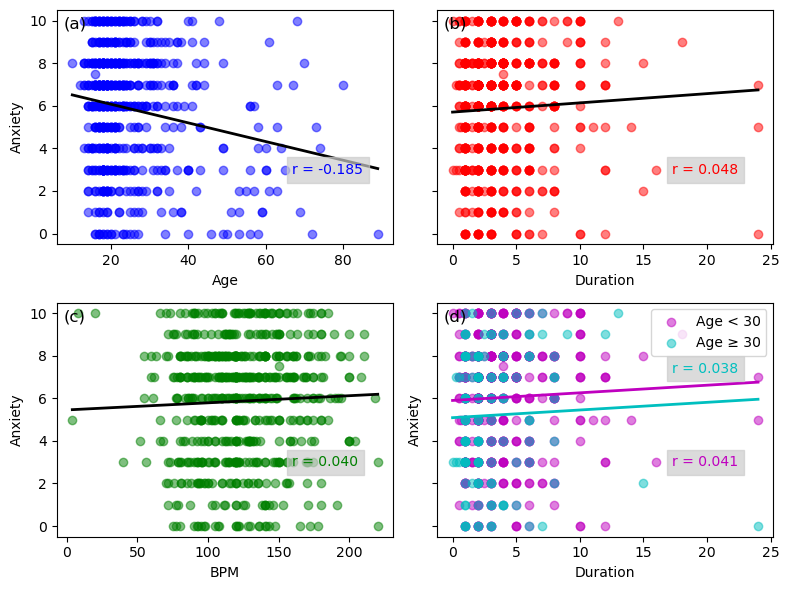

In [37]:
def plot_regression_line(ax, x, y, **kwargs):
    x = np.asarray(x)
    y = np.asarray(y)
    mask = ~np.isnan(x) & ~np.isnan(y)
    x = x[mask]
    y = y[mask]

    m, b = np.polyfit(x, y, 1)     
    xx = np.linspace(x.min(), x.max(), 100)
    yy = m * xx + b
    ax.plot(xx, yy, **kwargs)


def plot_descriptive():
  
    fig, axs = plt.subplots(2, 2, figsize=(8, 6), tight_layout=True)

  
    ivs      = [Age, Drt, BPM]
    xlabels  = ['Age', 'Duration', 'BPM']
    colors   = ['b', 'r', 'g']
    axes_flat = axs.ravel()


    for ax, x, lab, c in zip(axes_flat[:3], ivs, xlabels, colors):
        ax.scatter(x, y, alpha=0.5, color=c)
        plot_regression_line(ax, x, y, color='k', ls='-', lw=2)

        r = np.corrcoef(x, y)[0, 1]
        ax.text(0.7, 0.3,
                f'r = {r:.3f}',
                color=c,
                transform=ax.transAxes,
                bbox=dict(color='0.8', alpha=0.7))

        ax.set_xlabel(lab)

    for ax in axs[:, 0]:
        ax.set_ylabel('Anxiety')
 
    for ax in axs[:, 1]:
        ax.set_yticklabels([])


    axs[0, 1].set_xticks(np.arange(0, 26, 5))

  
    ax = axs[1, 1]     

    i_young = Age < 30
    i_old   = Age >= 30

    fcolors = ['m', 'c']
    labels  = ['Age < 30', 'Age ≥ 30']
    ylocs   = [0.3, 0.7]  

    for mask, c, s, yloc in zip([i_young, i_old], fcolors, labels, ylocs):
        ax.scatter(Drt[mask], y[mask],
                   alpha=0.5, color=c, label=s)
        plot_regression_line(ax, Drt[mask], y[mask],
                             color=c, ls='-', lw=2)

        r = np.corrcoef(Drt[mask], y[mask])[0, 1]
        ax.text(0.7, yloc,
                f'r = {r:.3f}',
                color=c,
                transform=ax.transAxes,
                bbox=dict(color='0.8', alpha=0.7))

    ax.legend()
    ax.set_xlabel('Duration')
    ax.set_ylabel('Anxiety')

    panel_labels = ['a', 'b', 'c', 'd']
    for ax, s in zip(axes_flat, panel_labels):
        ax.text(0.02, 0.92, f'({s})',
                size=12,
                transform=ax.transAxes)

    plt.show()
plot_descriptive()
